Test
====

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure plots are shown inside the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
raw_train_data = pd.read_csv('../Ultrasound/training_ultrasound.csv')

In [9]:
raw_train_data.head()

,STUDYID,SUBJID,SEXN,SEX,GAGEBRTH,BIRTHWT,BIRTHLEN,BIRTHHC,DELIVERY,PARITY,...,FEMURCM,ACAZ,BPDAZ,FLAZ,BHC_Z,BLEN_Z,BWT_Z,BWT_40,BLEN_40,BHC_40
0,1,1002,2,Female,276,3540,50.3,NaN,Category 2.0,1.0,...,7.3,0.463035,-0.237645,2.142646,NaN,0.891600,0.860470,3.614882,50.610029,NaN
1,1,1002,2,Female,276,3540,50.3,NaN,Category 2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.891600,0.860470,3.614882,50.610029,NaN
2,1,1002,2,Female,276,3540,50.3,NaN,Category 2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.891600,0.860470,3.614882,50.610029,NaN
3,1,1003,1,Male,280,3100,50.3,NaN,Category 2.0,1.0,...,6.3,-1.223773,-0.453516,1.616571,NaN,0.235298,-0.725564,3.100000,50.300000,NaN
4,1,1003,1,Male,280,3100,50.3,NaN,Category 2.0,1.0,...,6.3,-1.319698,-0.553987,1.495569,NaN,0.235298,-0.725564,3.100000,50.300000,NaN


In [10]:
raw_train_data.dtypes

STUDYID       int64
SUBJID        int64
SEXN          int64
SEX          object
GAGEBRTH      int64
BIRTHWT       int64
BIRTHLEN    float64
BIRTHHC     float64
DELIVERY     object
PARITY      float64
GRAVIDA     float64
GAGEDAYS      int64
AGEDAYS       int64
LENCM       float64
WTKG        float64
BMI         float64
HCIRCM      float64
HAZ         float64
WAZ         float64
WHZ         float64
BAZ         float64
HCAZ        float64
ABCIRCM     float64
BPDCM       float64
FEMURCM     float64
ACAZ        float64
BPDAZ       float64
FLAZ        float64
BHC_Z       float64
BLEN_Z      float64
BWT_Z       float64
BWT_40      float64
BLEN_40     float64
BHC_40      float64
dtype: object

In [8]:
import warnings
warnings.filterwarnings('ignore')

raw_train_data[:].describe()

warnings.filterwarnings('default')

In [12]:
raw_train_data.apply(lambda x: len(x.unique()))

STUDYID        2
SUBJID      2525
SEXN           2
SEX            2
GAGEBRTH      61
BIRTHWT      229
BIRTHLEN      92
BIRTHHC       40
DELIVERY       7
PARITY         8
GRAVIDA       10
GAGEDAYS     605
AGEDAYS      552
LENCM        402
WTKG         441
BMI         1003
HCIRCM       435
HAZ          637
WAZ          574
WHZ          601
BAZ          591
HCAZ        4347
ABCIRCM      325
BPDCM         91
FEMURCM       79
ACAZ        4186
BPDAZ       2035
FLAZ        1656
BHC_Z        193
BLEN_Z       717
BWT_Z       1973
BWT_40      1932
BLEN_40      710
BHC_40       185
dtype: int64

In [13]:
raw_train_data['SUBJID'].value_counts().value_counts()

5     469
4     449
11    292
10    250
6     231
9     220
3     220
8     116
7      97
12     84
13     46
1      34
14     11
15      6
Name: SUBJID, dtype: int64

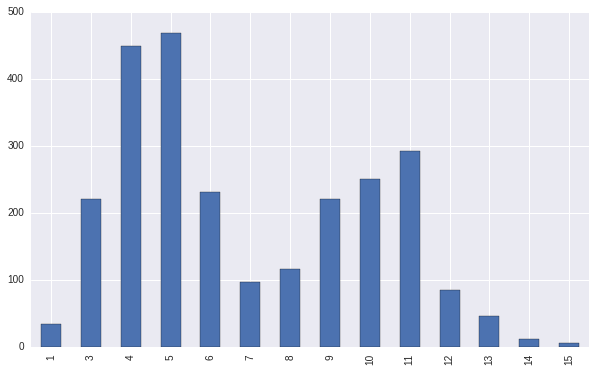

In [14]:
raw_train_data['SUBJID'].value_counts().value_counts().sort_index().plot.bar()

In [15]:
#sns.FacetGrid(raw_train_data, col="sex", row="smoker", margin_titles=True)

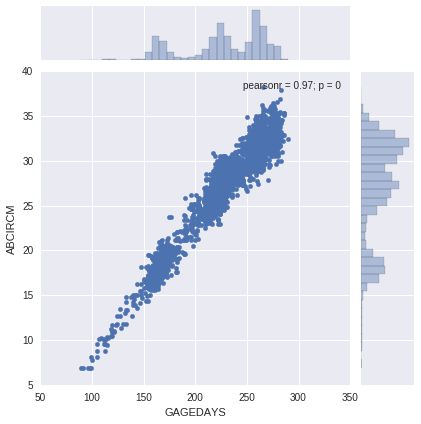

In [16]:
sns.jointplot(x='GAGEDAYS', y='ABCIRCM', data=raw_train_data[(raw_train_data.SEX == 'Male') & (raw_train_data.STUDYID == 1)])

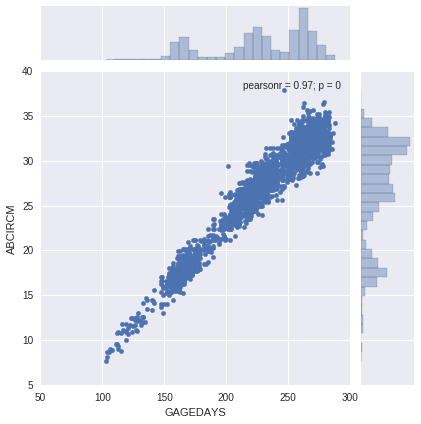

In [17]:
sns.jointplot(x='GAGEDAYS', y='ABCIRCM', data=raw_train_data[(raw_train_data.SEX == 'Female') & (raw_train_data.STUDYID == 1)])

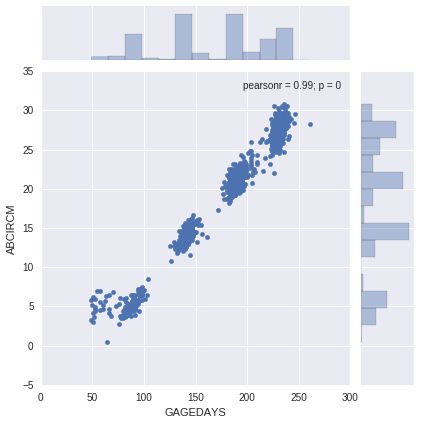

In [18]:
sns.jointplot(x='GAGEDAYS', y='ABCIRCM', data=raw_train_data[(raw_train_data.SEX == 'Male') & (raw_train_data.STUDYID == 2)])

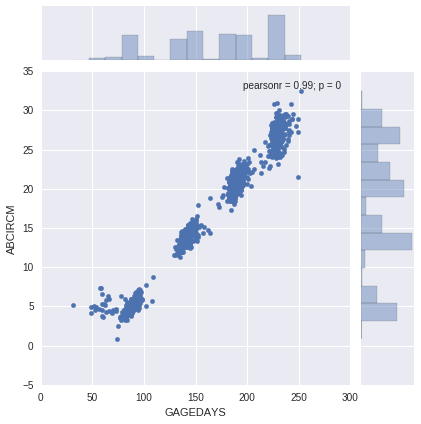

In [19]:
sns.jointplot(x='GAGEDAYS', y='ABCIRCM', data=raw_train_data[(raw_train_data.SEX == 'Female') & (raw_train_data.STUDYID == 2)])

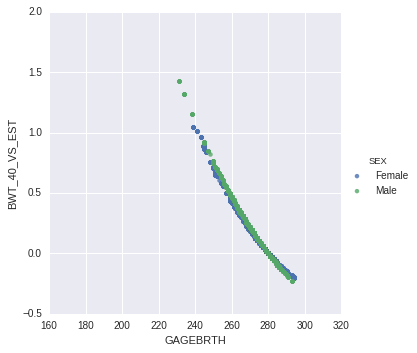

In [31]:
train_data = raw_train_data.copy()
train_data['BWT_40_VS_EST'] = raw_train_data['BWT_40'] - raw_train_data['BIRTHWT']/1000
sns.lmplot(x='GAGEBRTH', y='BWT_40_VS_EST', data=train_data, fit_reg=False, hue="SEX")

In [3]:
from sklearn.metrics import mean_squared_error
clean_data = raw_train_data[np.isfinite(raw_train_data['BWT_40'])]
mean_squared_error(clean_data['BWT_40'], clean_data['BIRTHWT']/1000)

0.051669405677382846

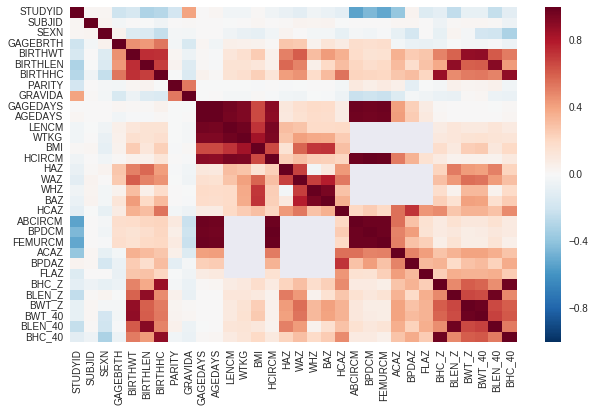

In [7]:
raw_train_data.corr()
sns.heatmap(raw_train_data.corr())